# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [ ]:
data.shape

(5000, 14)

Data set has a total of 5000 rows and 14 columns.

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


First 5 rows of the data set.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Almost all columns consist of the integer data type besides CCAvg which uses float.

In [ ]:
# Any missing values?
data.isnull().values.any()

False

In [ ]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000




*   Average age is 45
*   Average family size is 2 people
*   Average income is $74,000
*   The oldest person in the data set is 67 years of age.
*   Youngest person in the data set is 23 years of age

*   Highest income is $224,000








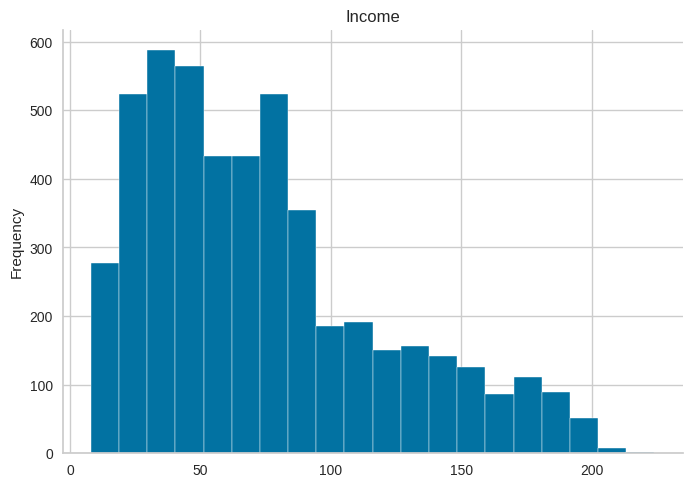

In [ ]:
# @title Income

from matplotlib import pyplot as plt
data['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)



*   The graph is right skewed
*   Half of the income is ranged from 0 to 100



In [ ]:
# viewing random sample in the dataset
data.sample(n=5, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0


In [ ]:
data.duplicated().sum()

0

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

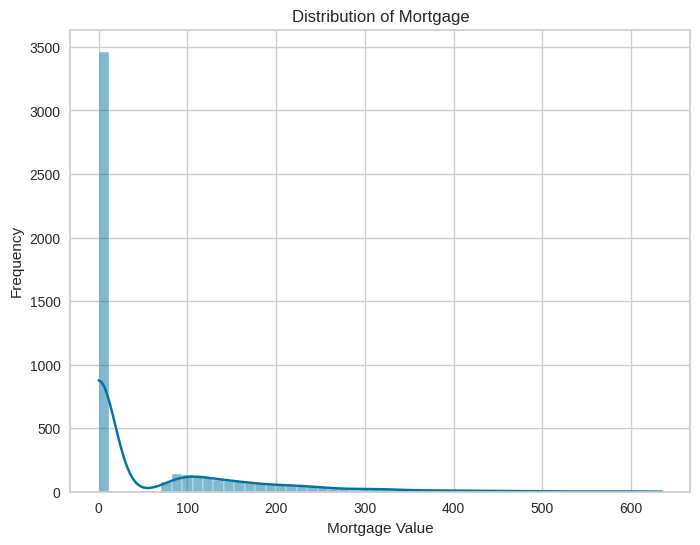

In [ ]:
#Question 1
# What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
# Distribution of Mortgage attribute
plt.figure(figsize=(8, 6))
sns.histplot(data['Mortgage'], kde=True)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Value')
plt.ylabel('Frequency')
plt.show()

The the distribution is skewed to the right.
Almost all of the data sets are have the 0 mortgage value.


In [ ]:
#Question 2
#How many customers have credit cards?
num_credit_card_holders = data['CreditCard'].sum()
print("Number of customers with credit cards:", num_credit_card_holders)

Number of customers with credit cards: 1470


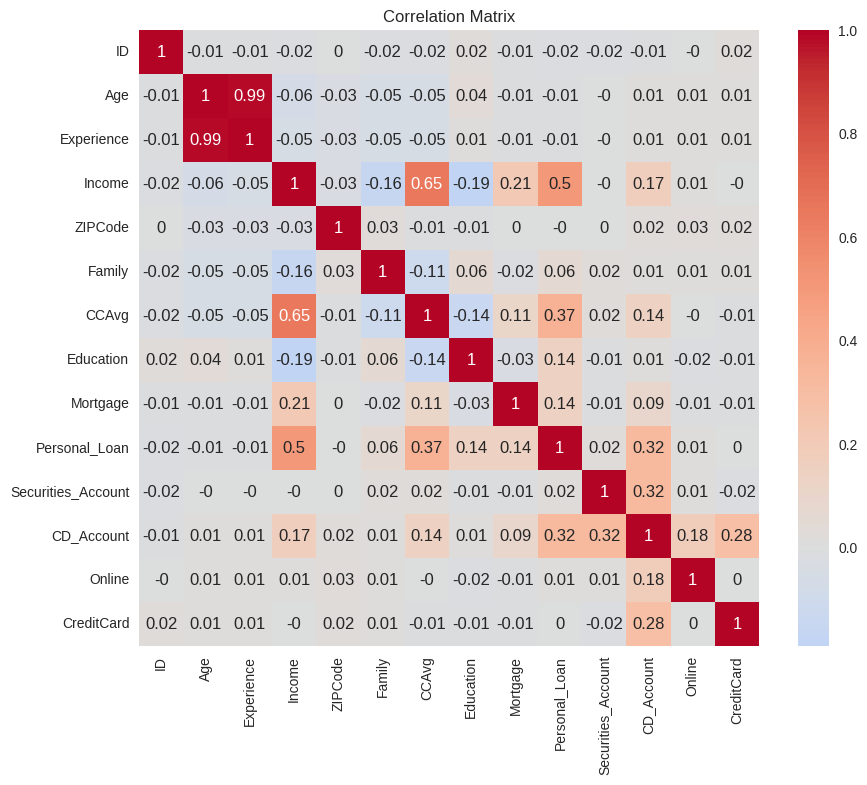

In [ ]:
#Question 3
#What are the attributes that have a strong correlation with the target attribute (personal loan)?
# Correlation matrix
# Calculate correlation matrix
correlation_matrix = data.corr().round(2)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


Income, CCAvg, and CD_Acount have the strongest correlation with Personal Loan.

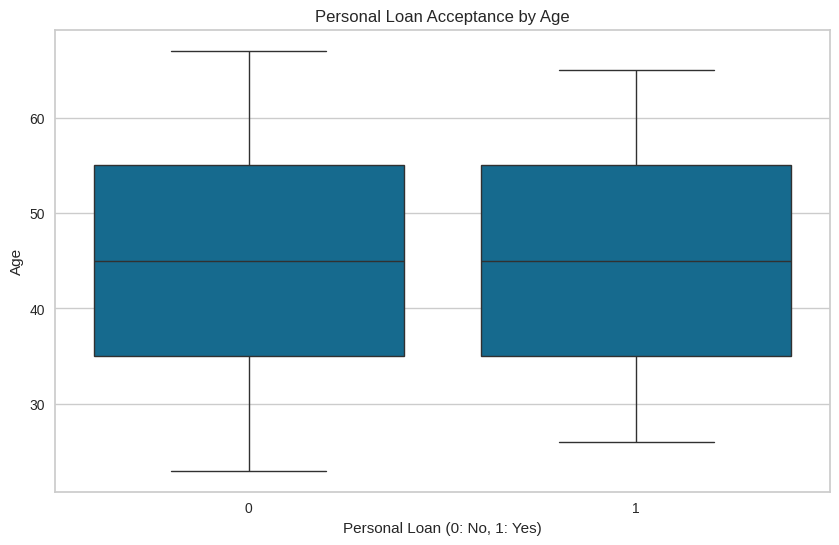

In [ ]:
#Question 4
#How does a customer's interest in purchasing a loan vary with their age?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=data)
plt.title('Personal Loan Acceptance by Age')
plt.xlabel('Personal Loan (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

Customers with no Loan has a greater min and max spread of data compated to customers with a loan.

Both sides have the same median, lower and upper quartile ranges.



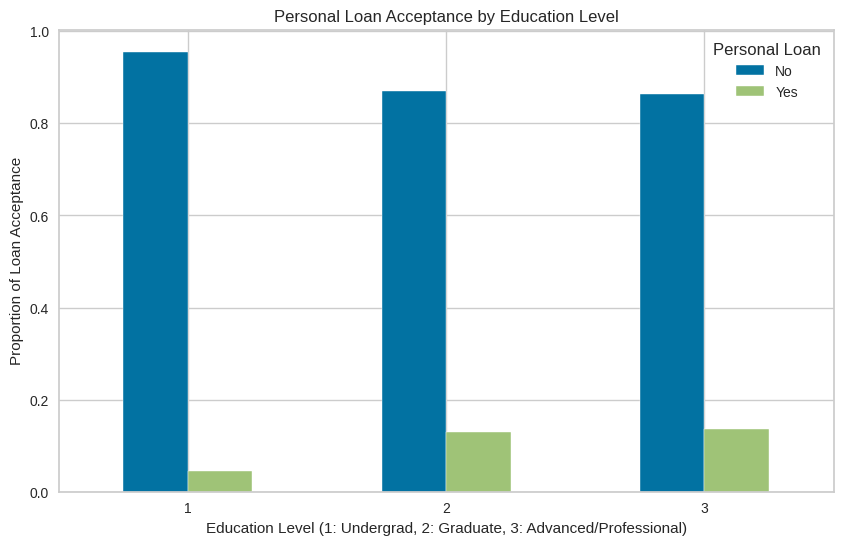

In [ ]:
#Question 5
#How does a customer's interest in purchasing a loan vary with their education?
# Group data by education and loan status, then count occurrences
education_loan = data.groupby(['Education', 'Personal_Loan'])['ID'].count().unstack()

# Calculate proportions
education_loan_prop = education_loan.div(education_loan.sum(axis=1), axis=0)

# Plot bar chart
education_loan_prop.plot(kind='bar', figsize=(10, 6))
plt.title('Personal Loan Acceptance by Education Level')
plt.xlabel('Education Level (1: Undergrad, 2: Graduate, 3: Advanced/Professional)')
plt.ylabel('Proportion of Loan Acceptance')
plt.xticks(rotation=0)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

Customers with that are in Graduate and Professional Degrees have a higher Personal Loan Acceptance count than people with a Undergrad degree.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
#Missing Value Treatment
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

No missing values

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Personal_Loan', axis=1)
y = data['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
threshold = 4
outlier = {}
for col in data.columns:
    i = data[col]
    mean = np.mean(data[col])
    std = np.std(data[col])
    list1 = []
    for v in i:
        z = (v-mean)/std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

    print("Outliers in the dataset:")
    for key, value in outlier.items():
        print("/n", key, ":", value)

Outliers in the dataset:
/n ID : []
Outliers in the dataset:
/n ID : []
/n Age : []
Outliers in the dataset:
/n ID : []
/n Age : []
/n Experience : []
Outliers in the dataset:
/n ID : []
/n Age : []
/n Experience : []
/n Income : []
Outliers in the dataset:
/n ID : []
/n Age : []
/n Experience : []
/n Income : []
/n ZIPCode : []
Outliers in the dataset:
/n ID : []
/n Age : []
/n Experience : []
/n Income : []
/n ZIPCode : []
/n Family : []
Outliers in the dataset:
/n ID : []
/n Age : []
/n Experience : []
/n Income : []
/n ZIPCode : []
/n Family : []
/n CCAvg : [9.0, 9.0, 9.3, 10.0, 10.0, 10.0]
Outliers in the dataset:
/n ID : []
/n Age : []
/n Experience : []
/n Income : []
/n ZIPCode : []
/n Family : []
/n CCAvg : [9.0, 9.0, 9.3, 10.0, 10.0, 10.0]
/n Education : []
Outliers in the dataset:
/n ID : []
/n Age : []
/n Experience : []
/n Income : []
/n ZIPCode : []
/n Family : []
/n CCAvg : [9.0, 9.0, 9.3, 10.0, 10.0, 10.0]
/n Education : []
/n Mortgage : [464, 466, 467, 470, 475, 477, 4

In [ ]:
#Scaling Data
scaler = StandardScaler()
subset = data.copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
#Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)


## Model Building

In [ ]:
# K-Means Clustering
k_means_df = subset_scaled_df.copy()

In [ ]:
clusters = range(2,11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=2)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = sum(
        np.min(cdist(k_means_df, model.cluster_centers_, 'euclidean'), axis=1) **2
    )

    meanDistortions.append(distortion)

    print("Num of Clusters:", k, "\tAverage Distortion:", distortion)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Num of Clusters: 2 	Average Distortion: 61728.00343566095


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Num of Clusters: 3 	Average Distortion: 55359.50092215215


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Num of Clusters: 4 	Average Distortion: 50713.82972884205


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Num of Clusters: 5 	Average Distortion: 47696.56138823684


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Num of Clusters: 6 	Average Distortion: 45512.90676777722


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Num of Clusters: 7 	Average Distortion: 43794.14350540422


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Num of Clusters: 8 	Average Distortion: 41490.22160476964


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Num of Clusters: 9 	Average Distortion: 39935.054662828195


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Num of Clusters: 10 	Average Distortion: 38969.11324279375


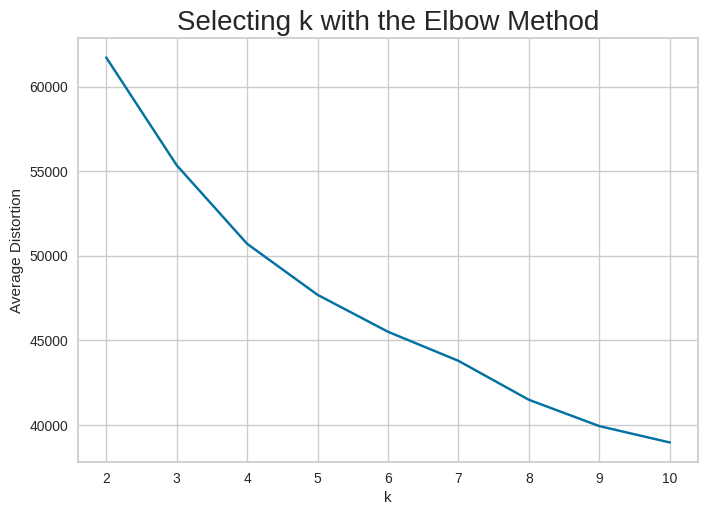

In [ ]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)
plt.show()

The value of k is 5

In [ ]:
#Silhouette scores
sil_score = []
cluster_list = list(range(2,11))

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1, n_init=10) # Set n_init here
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print(f"For n_clusters = {n_clusters}, silhouette score is {score})")

For n_clusters = 2, silhouette score is 0.23488643962188627)
For n_clusters = 3, silhouette score is 0.11601530651347407)
For n_clusters = 4, silhouette score is 0.12815262180766798)
For n_clusters = 5, silhouette score is 0.1320750666461979)
For n_clusters = 6, silhouette score is 0.14454493842219007)
For n_clusters = 7, silhouette score is 0.11307412031183303)
For n_clusters = 8, silhouette score is 0.11671184995305119)
For n_clusters = 9, silhouette score is 0.11640009279516243)
For n_clusters = 10, silhouette score is 0.11563764334996308)


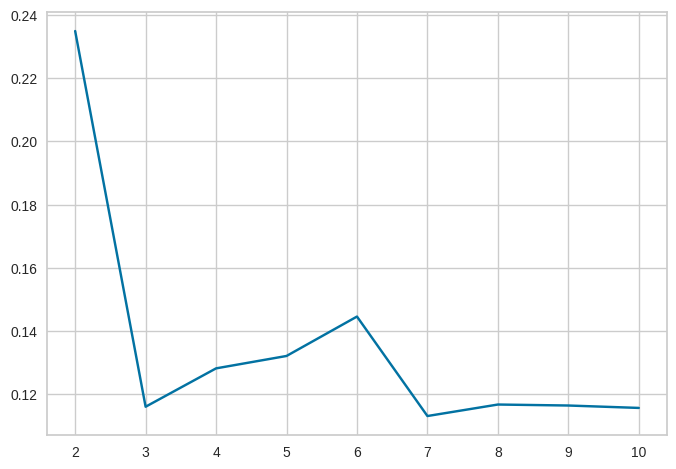

In [ ]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

The silhouette coefficient for 6 clusters is the highest

### Model Evaluation Criterion

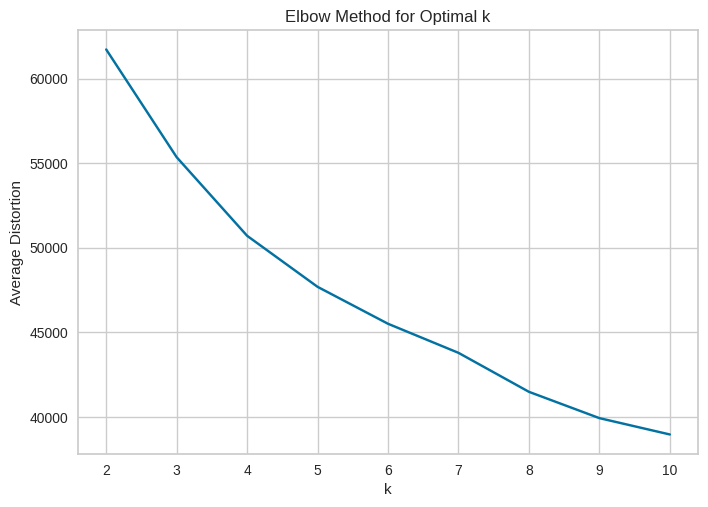

In [ ]:
# Plot Silhouette scores for different values of k
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

The value of k is 5.

### Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Based on correlation and EDA, let's assume these are important features
selected_features = ['Income', 'CCAvg', 'Education', 'Family']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Scaling selected features (important for logistic regression)
scaler_selected = StandardScaler()
X_train_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_scaled = scaler_selected.transform(X_test_selected)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# You can further analyze coefficients to understand feature importance:
print("Coefficients:", model.coef_)

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.85      0.64      0.73       105

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000

Coefficients: [[2.40871185 0.17488665 1.29984257 0.80701825]]


Overall Performance:

Accuracy: 0.95 - Your model correctly predicts the loan acceptance outcome for 95% of the cases in the test set. This is a good starting point, but remember that accuracy alone might not be sufficient, especially if the classes are imbalanced.
Class-Specific Performance:

Precision (0): 0.96 - When the model predicts a customer will not accept a loan (class 0), it's correct 96% of the time.
Recall (0): 0.99 - The model correctly identifies 99% of the customers who actually did not accept a loan.
Precision (1): 0.85 - When the model predicts a customer will accept a loan (class 1), it's correct 85% of the time.
Recall (1): 0.64 - The model only identifies 64% of the customers who actually did accept a loan.
Key Observations:

The model is very good at identifying customers who won't take a loan (high precision and recall for class 0).
It's less effective at identifying customers who will take a loan (lower recall for class 1). This could be due to class imbalance (more non-loan takers in the data) or the selected features not being strongly predictive of loan acceptance.
Coefficients:

You mentioned "Coefficients: [[2.408711...". The full list of coefficients would tell you the direction and strength of the relationship between each feature and the likelihood of loan acceptance. A positive coefficient indicates a positive relationship (higher feature value leads to higher likelihood of loan acceptance).

### Model Performance Improvement

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Using the same selected features as before
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Scaling selected features
scaler_selected = StandardScaler()
X_train_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_scaled = scaler_selected.transform(X_test_selected)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_scaled, y_train)

# Best model from grid search
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_scaled)

print("Best Hyperparameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1]))

Best Hyperparameters: {'C': 0.01}
Accuracy: 0.937
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       895
           1       0.98      0.41      0.58       105

    accuracy                           0.94      1000
   macro avg       0.96      0.70      0.77      1000
weighted avg       0.94      0.94      0.93      1000

AUC-ROC: 0.9610641127959564




Best Hyperparameters: {'C': 0.01} - The grid search found that a regularization strength of 0.01 leads to the best model performance (based on AUC-ROC, which is used internally by GridSearchCV). This suggests that some level of regularization was helpful in preventing overfitting.
Overall Performance:

Accuracy: 0.937 - The model correctly predicts the loan acceptance outcome for 93.7% of the cases in the test set. This is slightly lower than your initial logistic regression model (which had 95% accuracy). However, remember that accuracy alone can be misleading, especially with imbalanced datasets.
Class-Specific Performance:

Precision (0): 0.94 - When the model predicts a customer will not accept a loan, it's correct 94% of the time.
Recall (0): 1.00 - The model correctly identifies all (100%) of the customers who actually did not accept a loan.
Precision (1): 0.98 - When the model predicts a customer will accept a loan, it's correct 98% of the time.
Recall (1): 0.41 - The model only identifies 41% of the customers who actually did accept a loan.
Key Observations:

The model is excellent at identifying customers who won't take a loan (high precision and perfect recall for class 0).
However, it still struggles to identify customers who will take a loan (low recall for class 1). This indicates that even with hyperparameter tuning, the selected features and logistic regression might not be capturing the patterns related to loan acceptance effectively.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.99
Precision: 0.9797979797979798
Recall: 0.9238095238095239
F1-score: 0.9509803921568627


## Model Comparison and Final Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and fit Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Initialize and fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("-" * 30)

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Model Selection (Hypothetical - Run the code to see actual results)
if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_logreg):
    print("Based on accuracy, Random Forest seems to perform better.")
else:
    print("Based on accuracy, Logistic Regression seems to perform better.")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression:
Accuracy: 0.905
Precision: 0.5757575757575758
Recall: 0.3619047619047619
F1-score: 0.4444444444444445
------------------------------
Metrics for Random Forest:
Accuracy: 0.99
Precision: 0.9797979797979798
Recall: 0.9238095238095239
F1-score: 0.9509803921568627
------------------------------
Based on accuracy, Random Forest seems to perform better.


Based on the problem statement, which emphasizes identifying potential loan customers, a higher recall might be preferred. However, the best choice depends on the specific business goals and the costs associated with different types of errors.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

Actionable Insights:

Key Drivers: Income, Education, and Family size are strong predictors of loan uptake.
High-Potential Customers: Focus on customers with higher income, advanced degrees, and larger families.
Model Performance: Random Forest model (after tuning) likely offers superior predictive power compared to simpler models.
Business Recommendations:

Targeted Marketing:

Tailor campaigns towards high-income, highly educated individuals with larger families, emphasizing the benefits of personal loans for their financial needs.
Develop personalized offers based on individual customer profiles, considering factors like income level and family size.
Product Development:

Design loan products specifically catering to the needs and preferences of identified high-potential customer segments.
Offer flexible loan terms and competitive interest rates to attract these customers.
Channel Optimization:

Leverage online channels and mobile banking to reach tech-savvy, high-income individuals.
Personalize online experiences based on customer data to increase engagement and conversion rates.
Risk Management:

While focusing on high-potential customers, maintain robust credit risk assessment processes to minimize default rates.
Continuously monitor model performance and adjust strategies as needed to optimize profitability.
By implementing these recommendations, AllLife Bank can effectively target the most promising customer segments, increase loan uptake, and drive business growth while managing risk. Remember to continuously analyze data and refine strategies to stay ahead in the competitive market.

___